# Haslam index

In [1]:
from healpy.newvisufunc import projview
from healpy.rotator import Rotator
import healpy as hp
import traceback

from pygdsm import (
    GlobalSkyModel2016,
    GlobalSkyModel,
    LowFrequencySkyModel,
    HaslamSkyModel,
)

from pylfmap import LFmap
from SSM import SSM

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

import os
import sys
from radiocalibrationtoolkit import *

[INFO] LFmap: Import successful.


In [2]:
# some global plot settings
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize']= 14

plt.rcParams['xtick.major.width']= 2
plt.rcParams['ytick.major.width']= 2

plt.rcParams['xtick.major.size']= 5
plt.rcParams['ytick.major.size']= 5

plt.rcParams['xtick.labelsize']= 14
plt.rcParams['ytick.labelsize']= 14

In [3]:
# Prepare objects
lfmap = LFmap()
lfss = LowFrequencySkyModel(freq_unit="MHz")
gsm2008 = GlobalSkyModel(freq_unit="MHz")
gsm2016 = GlobalSkyModel2016(freq_unit="MHz")
ssm = SSM()
gmoss = GMOSS()
ulsa_fdi = ULSA(index_type='freq_dependent_index')
ulsa_ci = ULSA(index_type='constant_index')
ulsa_dpi = ULSA(index_type='direction_dependent_index')

[INFO] Available frequencies are:
['10.0', '100.0', '101.0', '102.0', '103.0', '104.0', '105.0', '106.0', '107.0', '108.0', '109.0', '11.0', '110.0', '111.0', '112.0', '113.0', '114.0', '115.0', '116.0', '117.0', '118.0', '119.0', '12.0', '120.0', '121.0', '122.0', '123.0', '124.0', '13.0', '14.0', '15.0', '16.0', '17.0', '18.0', '19.0', '20.0', '21.0', '22.0', '23.0', '24.0', '25.0', '26.0', '27.0', '28.0', '29.0', '30.0', '30.1', '30.2', '30.3', '30.4', '30.5', '30.6', '30.7', '30.8', '30.9', '31.0', '31.1', '31.2', '31.3', '31.4', '31.5', '31.6', '31.7', '31.8', '31.9', '32.0', '32.1', '32.2', '32.3', '32.4', '32.5', '32.6', '32.7', '32.8', '32.9', '33.0', '33.1', '33.2', '33.3', '33.4', '33.5', '33.6', '33.7', '33.8', '33.9', '34.0', '34.1', '34.2', '34.3', '34.4', '34.5', '34.6', '34.7', '34.8', '34.9', '35.0', '35.1', '35.2', '35.3', '35.4', '35.5', '35.6', '35.7', '35.8', '35.9', '36.0', '36.1', '36.2', '36.3', '36.4', '36.5', '36.6', '36.7', '36.8', '36.9', '37.0', '37.1', '37.

In [4]:
spectral_incides = np.linspace(-2.8,-2.2,31)
frequency_range = np.arange(30, 85, 5)

# frequency_MHz = 45

diff_dict = {}
for frequency_MHz in frequency_range:

    lfmap_map = hp.rotator.Rotator.rotate_map_pixel(
        Rotator(coord=["C", "G"]), lfmap.generate(frequency_MHz)
    )
    lfmap_map = lfmap.generate(frequency_MHz)
    lfss_map = lfss.generate(frequency_MHz)
    gsm2008_map = gsm2008.generate(frequency_MHz)
    gsm2016_map = gsm2016.generate(frequency_MHz)
    ssm_map = ssm.generate(frequency_MHz)
    gmoss_map = gmoss.generate(frequency_MHz)
    ulsa_fdi_map = ulsa_fdi.generate(frequency_MHz)
    ulsa_ci_map = ulsa_ci.generate(frequency_MHz)
    ulsa_dpi_map = ulsa_dpi.generate(frequency_MHz)

    # convert to same NSIDE
    new_nside = 64
    lfmap_map_N = hp.ma(hp.pixelfunc.ud_grade(lfmap_map, new_nside))
    lfss_map_N = hp.ma(hp.pixelfunc.ud_grade(lfss_map, new_nside))
    gsm2008_map_N = hp.ma(hp.pixelfunc.ud_grade(gsm2008_map, new_nside))
    gsm2016_map_N = hp.ma(hp.pixelfunc.ud_grade(gsm2016_map, new_nside))
    ssm_map_N = hp.ma(hp.pixelfunc.ud_grade(ssm_map, new_nside))
    gmoss_map_N = hp.ma(hp.pixelfunc.ud_grade(gmoss_map, new_nside))
    ulsa_fdi_map_N = hp.ma(hp.pixelfunc.ud_grade(ulsa_fdi_map, new_nside))

    map_dict = {
        "LFSS": lfss_map_N,
        "GSM08": gsm2008_map_N,
        "GSM16": gsm2016_map_N,
        "LFmap": lfmap_map_N,
        "SSM": ssm_map_N,
        "GMOSS": gmoss_map_N,
        "ULSA": ulsa_fdi_map_N,
    }

    mean_diffs_list = []
    for spectral_index in spectral_incides:
        haslam = HaslamSkyModel(freq_unit="MHz", spectral_index=spectral_index)
        haslam_map = haslam.generate(frequency_MHz)
        haslam_map_N = hp.ma(hp.pixelfunc.ud_grade(haslam_map, new_nside))

        diff = []
        for key in map_dict:
            diff.append(np.sum(haslam_map_N)/np.sum(map_dict[key]))

        mean_diffs_list.append(np.mean(diff))

    diff_dict[frequency_MHz] = mean_diffs_list

[INFO] Outputing map at 30.0 MHz
[INFO] Outputing map at 30.0 MHz


[INFO] Outputing map at 35.0 MHz
[INFO] Outputing map at 35.0 MHz


[INFO] Outputing map at 40.0 MHz
[INFO] Outputing map at 40.0 MHz


[INFO] Outputing map at 45.0 MHz
[INFO] Outputing map at 45.0 MHz


[INFO] Outputing map at 50.0 MHz
[INFO] Outputing map at 50.0 MHz


[INFO] Outputing map at 55.0 MHz
[INFO] Outputing map at 55.0 MHz


[INFO] Outputing map at 60.0 MHz
[INFO] Outputing map at 60.0 MHz


[INFO] Outputing map at 65.0 MHz
[INFO] Outputing map at 65.0 MHz


[INFO] Outputing map at 70.0 MHz
[INFO] Outputing map at 70.0 MHz


[INFO] Outputing map at 75.0 MHz
[INFO] Outputing map at 75.0 MHz


[INFO] Outputing map at 80.0 MHz
[INFO] Outputing map at 80.0 MHz


Best: -2.534545454545454


/tmp/ipykernel_952442/2770450199.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


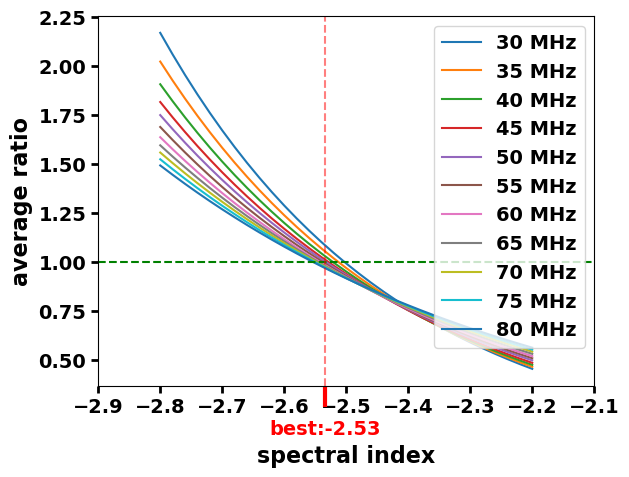

In [5]:
fig, ax = plt.subplots()
best = []
for key in diff_dict:
    ax.plot(spectral_incides, np.asarray(diff_dict[key]), label='{} MHz'.format(key))
    best.append(spectral_incides[np.argmin( np.abs(np.asarray(diff_dict[key])-1 ))])

ax.axes.axhline(1, linestyle='--', color='g')
# ax.axes.axvspan(np.min(best), np.max(best), alpha=0.5, color='g')
ax.axes.axvline(np.mean(best), alpha=0.5, color='r', linestyle='--')

ax.set_xlabel('spectral index')
ax.set_ylabel('average ratio')
ax.legend()

plt.draw() # this is required, or the ticklabels may not exist (yet) at the next step
labels = [w.get_text() for w in ax.get_xticklabels()]
locs=list(ax.get_xticks())
labels+=['\nbest:{:.2f}'.format(np.mean(best))]
locs+=[np.mean(best)]
ax.set_xticklabels(labels)
ax.set_xticks(locs)
plt.gca().get_xticklabels()[-1].set_color('red')

ax.xaxis.get_major_ticks()[-1].tick1line.set_markeredgewidth(3)
ax.xaxis.get_major_ticks()[-1].tick1line.set_markersize(15)
ax.xaxis.get_major_ticks()[-1].tick1line.set_markeredgecolor("red")

plt.draw()

print('Best: {}'.format(np.mean(best)))